[('AT', 'TG'), ('TG', 'GG'), ('GG', 'GC'), ('GC', 'CG'), ('CG', 'GT'), ('GT', 'TG'), ('TG', 'GC'), ('GC', 'CA'), ('CA', 'AA'), ('AA', 'AT'), ('AT', 'TG')]
[2 1 1 1 1 1 1 1 1 1]
[2, 1]


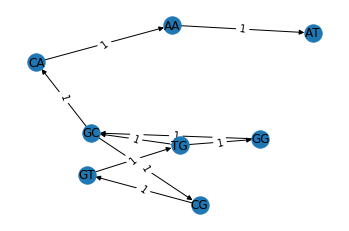

In [62]:
import numpy as np
# to make K-mers
#sequence = 'to_every_thing_turn_turn_turn_there_is_a_season'
sequence    = 'ATGGCGTGCAATG'
K = 3
kmer3 = []

def lr(s):               # Function to make left and right 
    l = s[:-1]
    r = s[1:]
    return (l,r)


for i in range(len(sequence)-(K-1)):
        mer = sequence[i: K+i]
        kmer3.append(mer)
        
#print(kmer3)

#To split K-mers to L & R (K-1 mer).

kmerLR= []
for i in range(len(kmer3)):
    LR = kmer3[i]
    kmerLR.append(lr(LR))
    
#print(kmerLR)


network = []
count = 0
counts = []

for i in range(len(kmerLR)):
    if kmerLR[i] not in network:
        network.append(kmerLR[i])



for i in range(len(network)):           
    for j in range(len(kmerLR)):
        if network[i] == kmerLR[j]:
            count += 1
    counts.append(count)
    count = 0
    
    
print(kmerLR)
#print(network)
#!print(counts)

###########################################1 Another counts algoritm
xi = network 
yi = kmerLR

countz = np.zeros(len(xi),int)

for i in range(len(yi)):
    for j in range(len(xi)):
        if yi[i] ==xi[j]:
            countz[j] = countz[j] + 1

print(countz)

#########################################1

# to package all weights and nodes to be packed into networkz

wei2  = []
one = []
two = []
three = []

for i in countz:
    if i not in wei2:
        wei2.append(i)
    else:
        pass

print(wei2)


for i in range(len(countz)) :
    if countz[i] == 1:
        one.append(kmerLR[i])
    elif countz[i] == 2:
        two.append(kmerLR[i])
    else:
        three.append(kmerLR[i])
        
#print(one)
#print(two)
#print(three)

#############################################  # to draw network

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_edges_from(one, weight=1)
#G.add_edges_from(two, weight=2)
#G.add_edges_from(three, weight=3)








pos = nx.spring_layout(G)
##pos=nx.get_node_attributes(G,'pos')


labels = nx.get_edge_attributes(G,'weight')

##node_labels = {'A':1,'B':2,'C':3,'D':'!'}
node_labels = {node:node for node in G.nodes()}                    # a way of creating a dictionary



nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)
nx.draw_networkx_labels(G, pos, labels=node_labels)


nx.draw(G,pos)



